In [1]:
import pandas as pd 

file_path = r"C:\Users\hamza\Downloads\cs 484 project\BostonHousing.csv"

data= pd.read_csv(file_path)



In [9]:

print(data.isnull().sum())

print("Total missing values:", data.isnull().sum().sum())


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
Total missing values: 0


In [14]:
X = data.drop(columns=["medv"]) 
y = data["medv"]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 24.2911
R-squared Score: 0.6688


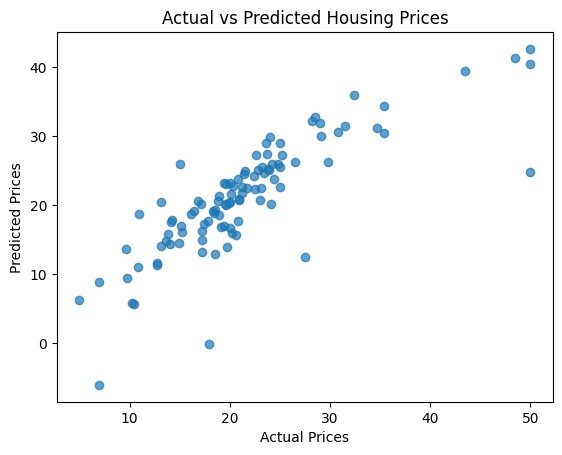

In [4]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()


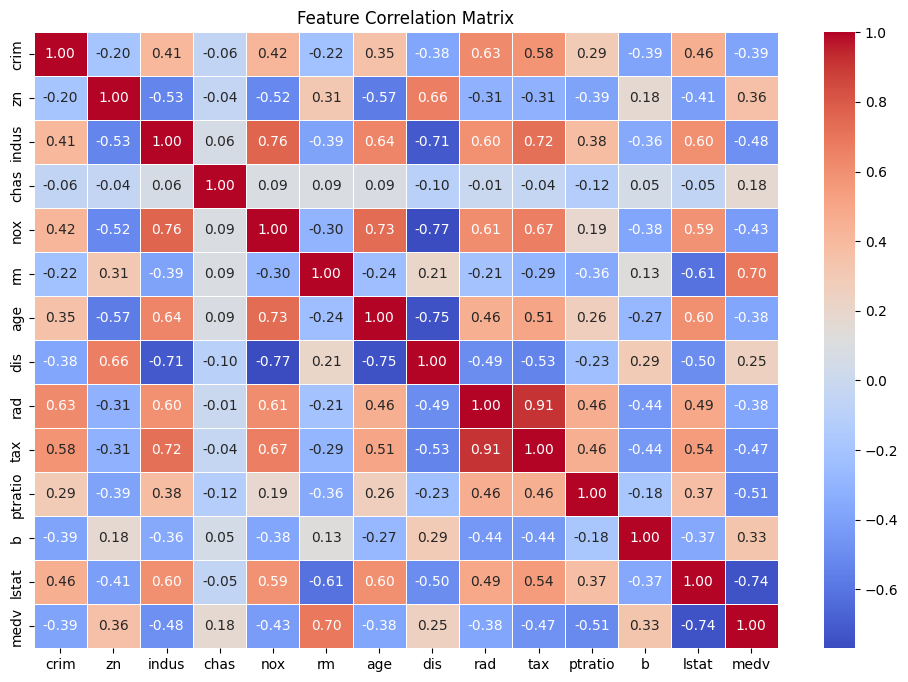

Top correlated features with 'medv':
 medv       1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
nox        0.427321
crim       0.388305
rad        0.381626
age        0.376955
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
Name: medv, dtype: float64


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

target_correlation = correlation_matrix["medv"].abs().sort_values(ascending=False)

print("Top correlated features with 'medv':\n", target_correlation)

Mean Squared Error: 11.8776
R-squared Score: 0.8380


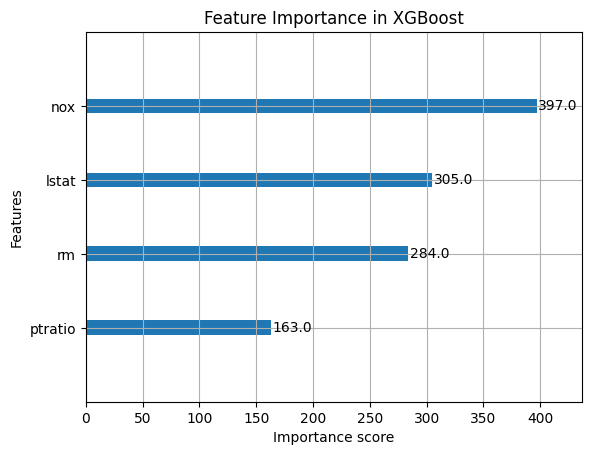

In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

best_features = ["lstat", "rm", "ptratio", "nox"]

X_1 = data[best_features]
y_1 = data["medv"]  

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_1, y_1, test_size=0.2, random_state=42)


X_train_xgb = X_train_xgb.astype(float)
X_test_xgb = X_test_xgb.astype(float)

xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=200,  
    learning_rate=0.05, 
    max_depth=3,  
    min_child_weight=5, 
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=10,  
    reg_alpha=1,  
    random_state=42
)

xgb_model.fit(X_train_xgb, y_train_xgb)

y_pred_xgb = xgb_model.predict(X_test_xgb)

mse = mean_squared_error(y_test_xgb, y_pred_xgb)
r2 = r2_score(y_test_xgb, y_pred_xgb)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

xgb.plot_importance(xgb_model)
plt.title("Feature Importance in XGBoost")
plt.show()


In [12]:
y_train_pred_xgb = xgb_model.predict(X_train_xgb)
y_test_pred_xgb = xgb_model.predict(X_test_xgb)

train_mse = mean_squared_error(y_train_xgb, y_train_pred_xgb)
test_mse = mean_squared_error(y_test_xgb, y_test_pred_xgb)

train_r2 = r2_score(y_train_xgb, y_train_pred_xgb)
test_r2 = r2_score(y_test_xgb, y_test_pred_xgb)

print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Testing Mean Squared Error: {test_mse:.4f}")
print(f"Training R-squared Score: {train_r2:.4f}")
print(f"Testing R-squared Score: {test_r2:.4f}")


Training Mean Squared Error: 6.8523
Testing Mean Squared Error: 11.8776
Training R-squared Score: 0.9211
Testing R-squared Score: 0.8380


In [13]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X_train_xgb, y_train_xgb, cv=5, scoring="r2")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {np.mean(cv_scores):.4f}")


Cross-Validation R² Scores: [0.83886683 0.78414719 0.88094733 0.86706184 0.74189002]
Mean CV R² Score: 0.8226
